## Unsupervised machine learning: clustering
In alle the other small task we tried to make a model that could predict somthing by "not looking" at the answer. Even tho we had the answer in the dataset, we tried to make the model predict it. 
This task is called "clustering", that means we dont have the answer, we dont have our "cheatsheet" we can look at

what we are going to do this task : 
- Apply a clustering algorithm for segmentation of the employees in groups of similarity

- Evaluate the quality of the results by calculating a silhouette score and recommend a cluster
configuration with the highest score

As normal we load and clean the data from the task

In [ ]:
# Note: this import can change from class to class in MP3 

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Style til grafer
sns.set(style="whitegrid")

In [ ]:
# Load data 
emp_data = pd.read_csv('../Data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Clean dataset (there are no duplicates or null values, so no action needed for deleting those)
print(emp_data.isnull().sum())
print("Duplicate values: ", emp_data.duplicated().sum())

emp_data.columns

## 1. Choose relevant features
Vi vælger kolonner fra datasættet, som vi tror indeholder mønstre blandt medarbejderne

**Why?** 

Clusters dannes baseret ud fra ligheder mellem features. K-means vil forsøge at gruppere dem, der har lignende værdier.


In [ ]:
cluster_features = [
    'Age',
    'MonthlyIncome',
    'DistanceFromHome',
    'JobLevel',
    'YearsAtCompany',
    'JobSatisfaction',
    'WorkLifeBalance'
]

X = emp_data[cluster_features]

# Note we dont have a target like in 2_income, instead we just have featues as shown above

## 2. Scale the data 
- **StandardScaler()** standardiserer vores features, således at hver kolonne får gennemsnit=0 og standardafvigelse=1.
- **fit_transform(X)** lærer hvad gennemsnit og standardafvigelse er, og skalerer derefter alle værdier.

**Why?** 

K-means er følsom overfor store tal - fx kan 'MonthlyIncome' dominere 'JobSatisfaction', fordi det er på en større skala.

Standardisering sikrer, at alle features vægtes nogenlunde ens.

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 3. Run the K-Means algorithm
- **n_clusters=3** - Vi beder KMeans om at finde 3 clusters
- **fit(X_scaled)** - Kører algoritmen og tildeler hvert datapunkt en klynge
- **labels** - Listen over hvilket cluster (0,1,2) hver medarbejder blev placeret i

**Why?**

K-means opdeler data i K grupper, hvor hvert punkt tilhører den nærmeste center. 
Algoritmen forsøger at minimere afstanden mellem punkter og deres gruppecenter.

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

## 4. Evaluer med Silhouette Score
- **silhouette_score** - Måler hvor gode vores clusters er
    - **Høj score (tæt på 1)** = god adskillelse og tæthed i grupper
    - **Lav score** = clusters er uklare eller overlapper

**Why?**

Vi vil gerne finde det optimale antal clusters. Vi kan ændre på **n_clusters=3**, og prøve os frem fra 2-10, og finde det antal der giver højest score.

I vores tilfælde er sillhouette scoren højst (altså tættest på 1) når vi har 6 clusters

In [68]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, labels)
print("Silhouette score: ", score)

Silhouette score:  0.31752096091478255


## 5. Visualisér med PCA
- **PCA** reducerer alle vores features til 2 "nye" dimensioner, så vi kan tegne data i 2D
- **X_pca** indeholder de nye koordinater
- **plt.scatter(..., c=labels)** tegner punkter og farver dem efter klynge

**Why?**

Clustering foregår i mange dimensioner, men vi kan ikke visualisere 6D. 

PCA hjælper os med at "projicere" data til 2D, så vi kan se clusters og vurdere, om de giver mening visuelt.

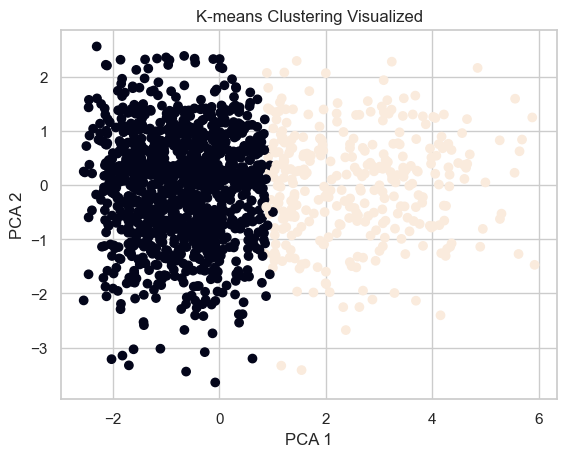

In [69]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("K-means Clustering Visualized")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

## Evaluation
The most optimal amount of clusters that we recommend is **2**, as the silhouette score is highest with 2 clusters (We have tried from 2-10 clusters)

The silhouette score is **0.31752096091478255** with 2 clusters. This is the closest we can get to 1, thus making it the best quality of the results we can get
